In [1]:
import pystac_client
import planetary_computer

To access the data, we’ll create a pystac_client.Client. We’ll explain the modifier part later on, but it’s what lets us download the data assets Azure Blob Storage.

In [2]:
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

In [3]:
time_range = "2020-12-01/2020-12-31"
bbox = [-122.2751, 47.5469, -121.9613, 47.7458]

search = catalog.search(collections=["landsat-c2-l2"], bbox=bbox, datetime=time_range)
items = search.get_all_items()
len(items)

C:\Users\niels\Anaconda3\envs\BmC\Lib\site-packages\pystac_client\item_search.py:896: FutureWarning: get_all_items() is deprecated, use item_collection() instead.
  warnings.warn(


8

Alternatively, you can pass a GeoJSON object as intersects

In [4]:
area_of_interest = {
    "type": "Polygon",
    "coordinates": [
        [
            [-122.2751, 47.5469],
            [-121.9613, 47.9613],
            [-121.9613, 47.9613],
            [-122.2751, 47.9613],
            [-122.2751, 47.5469],
        ]
    ],
}

time_range = "2020-12-01/2020-12-31"

search = catalog.search(
    collections=["landsat-c2-l2"], intersects=area_of_interest, datetime=time_range
)

Each `pystac.Item <https://pystac.readthedocs.io/en/stable/api/pystac.html#pystac.Item>`__ in this ItemCollection includes all the metadata for that scene. STAC Items are GeoJSON features, and so can be loaded by libraries like geopandas.

In [6]:
import geopandas

df = geopandas.GeoDataFrame.from_features(items.to_dict(), crs="epsg:4326")
df

,geometry,gsd,created,sci:doi,datetime,platform,proj:shape,description,instruments,eo:cloud_cover,...,landsat:scene_id,landsat:wrs_path,landsat:wrs_type,view:sun_azimuth,landsat:correction,view:sun_elevation,landsat:cloud_cover_land,landsat:collection_number,landsat:collection_category,proj:code
0,"POLYGON ((-122.72549 48.50884, -120.29248 48.0...",30,2022-05-06T18:04:17.126358Z,10.5066/P9OGBGM6,2020-12-29T18:55:56.738265Z,landsat-8,"[7881, 7781]",Landsat Collection 2 Level-2,"[oli, tirs]",100.00,...,LC80460272020364LGN00,046,2,162.253231,L2SP,17.458298,100.00,02,T2,EPSG:32610
1,"POLYGON ((-124.52046 48.44245, -121.93932 48.0...",30,2022-05-06T17:25:29.626986Z,10.5066/P9C7I13B,2020-12-28T18:20:32.609164Z,landsat-7,"[7361, 8341]",Landsat Collection 2 Level-2,[etm+],31.00,...,LE70470272020363EDC00,047,2,152.689113,L2SP,14.678880,32.00,02,T1,EPSG:32610
2,"POLYGON ((-122.96802 48.44547, -120.39024 48.0...",30,2022-05-06T18:01:04.319403Z,10.5066/P9C7I13B,2020-12-21T18:14:50.812768Z,landsat-7,"[7251, 8251]",Landsat Collection 2 Level-2,[etm+],25.00,...,LE70460272020356EDC00,046,2,153.649177,L2SP,14.779612,24.00,02,T2,EPSG:32610
3,"POLYGON ((-124.27547 48.50831, -121.84167 48.0...",30,2022-05-06T17:46:22.246696Z,10.5066/P9OGBGM6,2020-12-20T19:02:09.878796Z,landsat-8,"[7971, 7861]",Landsat Collection 2 Level-2,"[oli, tirs]",100.00,...,LC80470272020355LGN00,047,2,163.360118,L2SP,17.414441,100.00,02,T2,EPSG:32610
4,"POLYGON ((-122.72996 48.50858, -120.2969 48.07...",30,2022-05-06T18:04:16.935800Z,10.5066/P9OGBGM6,2020-12-13T18:56:00.096447Z,landsat-8,"[7881, 7781]",Landsat Collection 2 Level-2,"[oli, tirs]",98.73,...,LC80460272020348LGN00,046,2,164.126188,L2SP,17.799744,98.64,02,T2,EPSG:32610
5,"POLYGON ((-124.51935 48.44597, -121.93965 48.0...",30,2022-05-06T17:25:29.412798Z,10.5066/P9C7I13B,2020-12-12T18:21:42.991249Z,landsat-7,"[7361, 8341]",Landsat Collection 2 Level-2,[etm+],17.00,...,LE70470272020347EDC00,047,2,154.692691,L2SP,15.427422,12.00,02,T1,EPSG:32610
6,"POLYGON ((-122.98709 48.4479, -120.40945 48.06...",30,2022-05-06T18:01:04.178839Z,10.5066/P9C7I13B,2020-12-05T18:16:03.755599Z,landsat-7,"[7281, 8251]",Landsat Collection 2 Level-2,[etm+],2.00,...,LE70460272020340EDC00,046,2,155.308739,L2SP,16.313570,2.00,02,T1,EPSG:32610
7,"POLYGON ((-124.27385 48.50833, -121.83965 48.0...",30,2022-05-06T17:46:22.097338Z,10.5066/P9OGBGM6,2020-12-04T19:02:11.194486Z,landsat-8,"[7971, 7861]",Landsat Collection 2 Level-2,"[oli, tirs]",1.55,...,LC80470272020339LGN00,047,2,164.914060,L2SP,18.807230,1.90,02,T1,EPSG:32610


Some collections implement the eo extension, which we can use to sort the items by cloudiness. We’ll grab an item with low cloudiness:

In [21]:
# Get a collection, e.g. Landsat 8 Level 2
collection = catalog.get_collection("landsat-c2-l2")

# Check extensions
print(collection.stac_extensions)

['https://stac-extensions.github.io/item-assets/v1.0.0/schema.json', 'https://stac-extensions.github.io/view/v1.0.0/schema.json', 'https://stac-extensions.github.io/scientific/v1.0.0/schema.json', 'https://stac-extensions.github.io/raster/v1.0.0/schema.json', 'https://stac-extensions.github.io/eo/v1.0.0/schema.json', 'https://stac-extensions.github.io/table/v1.2.0/schema.json']


'https://stac-extensions.github.io/eo/v1.0.0/schema.json' is present and as such the collection has the eo extention

In [7]:
selected_item = min(items, key=lambda item: item.properties["eo:cloud_cover"])
print(selected_item)

<Item id=LC08_L2SP_047027_20201204_02_T1>


Each STAC item has one or more Assets, which include links to the actual files.

In [9]:
import rich.table

table = rich.table.Table("Asset Key", "Description")
for asset_key, asset in selected_item.assets.items():
    table.add_row(asset_key, asset.title)

table

┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Asset Key        ┃ Description                                                          ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ qa               │ Surface Temperature Quality Assessment Band                          │
│ ang              │ Angle Coefficients File                                              │
│ red              │ Red Band                                                             │
│ blue             │ Blue Band                                                            │
│ drad             │ Downwelled Radiance Band                                             │
│ emis             │ Emissivity Band                                                      │
│ emsd             │ Emissivity Standard Deviation Band                                   │
│ trad             │ Thermal Radiance Band                                                │
│ urad             │ Upwelled Radiance Band                                               │
│ atran            │ Atmospheric Transmittance Band                                       │
│ cdist            │ Cloud Distance Band                                                  │
│ green            │ Green Band                                                           │
│ nir08            │ Near Infrared Band 0.8                                               │
│ lwir11           │ Surface Temperature Band                                             │
│ swir16           │ Short-wave Infrared Band 1.6                                         │
│ swir22           │ Short-wave Infrared Band 2.2                                         │
│ coastal          │ Coastal/Aerosol Band                                                 │
│ mtl.txt          │ Product Metadata File (txt)                                          │
│ mtl.xml          │ Product Metadata File (xml)                                          │
│ mtl.json         │ Product Metadata File (json)                                         │
│ qa_pixel         │ Pixel Quality Assessment Band                                        │
│ qa_radsat        │ Radiometric Saturation and Terrain Occlusion Quality Assessment Band │
│ qa_aerosol       │ Aerosol Quality Assessment Band                                      │
│ tilejson         │ TileJSON with default rendering                                      │
│ rendered_preview │ Rendered preview                                                     │
└──────────────────┴──────────────────────────────────────────────────────────────────────┘

In [10]:
selected_item.assets["rendered_preview"].to_dict()

{'href': 'https://planetarycomputer.microsoft.com/api/data/v1/item/preview.png?collection=landsat-c2-l2&item=LC08_L2SP_047027_20201204_02_T1&assets=red&assets=green&assets=blue&color_formula=gamma+RGB+2.7%2C+saturation+1.5%2C+sigmoidal+RGB+15+0.55&format=png',
 'type': 'image/png',
 'title': 'Rendered preview',
 'rel': 'preview',
 'roles': ['overview']}

In [11]:
from IPython.display import Image

Image(url=selected_item.assets["rendered_preview"].href, width=500)

That rendered_preview asset is generated dynamically from the raw data using the Planetary Computer’s data API. We can access the raw data, stored as Cloud Optimzied GeoTIFFs in Azure Blob Storage, using one of the other assets.

The actual data assets are in private Azure Blob Storage containers. If forget to pass modifier=planetary_computer.sign_inplace or manually sign the item, then you’ll get a 404 when trying to access the asset.

That’s why we included the modifier=planetary_computer.sign_inplace when we created the pystac_client.Client earlier. With that, the results returned by pystac-client are automatically signed, so that a token granting access to the file is included in the URL.

In [12]:
selected_item.assets["blue"].href[:250] 
#.href: retrieves the URL (a string) pointing to the location of the asset (e.g., a GeoTIFF file)

'https://landsateuwest.blob.core.windows.net/landsat-c2/level-2/standard/oli-tirs/2020/047/027/LC08_L2SP_047027_20201204_20210313_02_T1/LC08_L2SP_047027_20201204_20210313_02_T1_SR_B2.TIF?st=2025-05-05T11%3A48%3A26Z&se=2025-05-06T12%3A33%3A26Z&sp=rl&sv'

Everything after the ? in that URL is a SAS token grants access to the data. See https://planetarycomputer.microsoft.com/docs/concepts/sas/ for more on using tokens to access data.

In [13]:
import requests

requests.head(selected_item.assets["blue"].href).status_code

200

he 200 status code indicates that we were able to successfully access the data using the “signed” URL with the SAS token included.

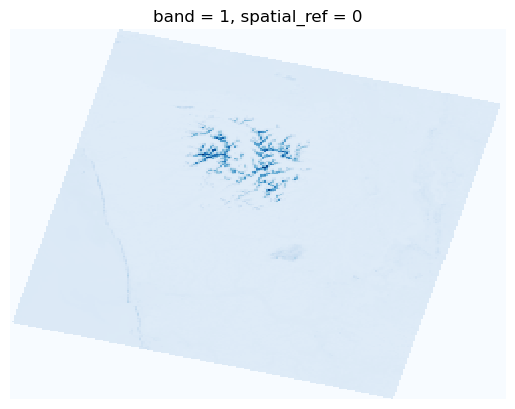

In [14]:
# import xarray as xr
import rioxarray

ds = rioxarray.open_rasterio(
    selected_item.assets["blue"].href, overview_level=4
).squeeze()
img = ds.plot(cmap="Blues", add_colorbar=False)
img.axes.set_axis_off();

If you wish to work with multiple STAC items as a datacube, you can use libraries like stackstac or odc-stac.

In [18]:
import stackstac

ds = stackstac.stack(items, epsg=32610)
ds

<xarray.DataArray 'stackstac-1ccff9c6c02e57f799614494f51083ed' (time: 8,
                                                                band: 22,
                                                                y: 8041,
                                                                x: 12395)> Size: 140GB
dask.array<fetch_raster_window, shape=(8, 22, 8041, 12395), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/31)
  * time                         (time) datetime64[ns] 64B 2020-12-04T19:02:1...
    id                           (time) <U31 992B 'LC08_L2SP_047027_20201204_...
  * band                         (band) <U13 1kB 'qa' 'red' ... 'atmos_opacity'
  * x                            (x) float64 99kB 3.275e+05 ... 7.134e+05
  * y                            (y) float64 64kB 5.377e+06 ... 5.134e+06
    description                  (band) object 176B 'Collection 2 Level-2 Qua...
    ...                           ...
    raster:bands                 (band) object 176B {'unit': 'kelvin', 'scale...
    classification:bitfields     (band) object 176B None None ... None
    common_name                  (band) object 176B None None None ... None None
    center_wavelength            (band) object 176B None None None ... None None
    full_width_half_max          (band) object 176B None None None ... None None
    epsg                         int64 8B 32610
Attributes:
    spec:           RasterSpec(epsg=32610, bounds=(327498.54891849955, 513348...
    crs:            epsg:32610
    transform:      | 31.14, 0.00, 327498.55|\n| 0.00,-30.28, 5376960.58|\n| ...
    resolution_xy:  (31.136960345930742, 30.279600297529875)

In [22]:
import pandas as pd

landsat = catalog.get_collection("landsat-c2-l2")

pd.DataFrame(landsat.summaries.get_list("eo:bands"))

,name,common_name,description,center_wavelength,full_width_half_max
0,TM_B1,blue,Visible blue (Thematic Mapper),0.49,0.07
1,TM_B2,green,Visible green (Thematic Mapper),0.56,0.08
2,TM_B3,red,Visible red (Thematic Mapper),0.66,0.06
3,TM_B4,nir08,Near infrared (Thematic Mapper),0.83,0.14
4,TM_B5,swir16,Short-wave infrared (Thematic Mapper),1.65,0.20
5,TM_B6,lwir,Long-wave infrared (Thematic Mapper),11.45,2.10
6,TM_B7,swir22,Short-wave infrared (Thematic Mapper),2.22,0.27
7,ETM_B1,blue,Visible blue (Enhanced Thematic Mapper Plus),0.48,0.07
8,ETM_B2,green,Visible green (Enhanced Thematic Mapper Plus),0.56,0.08
9,ETM_B3,red,Visible red (Enhanced Thematic Mapper Plus),0.66,0.06


In [23]:
import pystac_client
import planetary_computer

catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)
fia = catalog.get_collection("fia")
fia

<CollectionClient id=fia>